### Исследование таблицы "Ингредиенты"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./data/new_vitamins.xlsx")

In [3]:
df.head()

,ID ингридиента БАДа,Название ингридиента БАДа,Взаимодействие с пищевыми продуктами,Рекомендуемая суточная доза,Верхний уровень безопасного потребления
0,V000000001,-,Взаимодействия не найдены.,NaN,NaN
1,V000000002,5-гидрокситриптофан,Взаимодействия не найдены.,NaN,NaN
2,V000000004,A,Взаимодействия не найдены.,NaN,NaN
3,V000000005,B1,Взаимодействия не найдены.,NaN,NaN
4,V000000006,B12,Принимайте независимо от приема пищи. Рекоменд...,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID ингридиента БАДа                      375 non-null    object 
 1   Название ингридиента БАДа                375 non-null    object 
 2   Взаимодействие с пищевыми продуктами     375 non-null    object 
 3   Рекомендуемая суточная доза              0 non-null      float64
 4   Верхний уровень безопасного потребления  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 14.8+ KB


Всего в базе 375 ингредиентов, из которых одни не определен (-). Ищем информацию по пропущенным ингредиентам.

Два столбца - Рекомендуемая суточная доза и Верхний уровень безопасного потребления пока не заполнены, информация собирается.

In [5]:
df.drop(["Рекомендуемая суточная доза", "Верхний уровень безопасного потребления"], axis=1, inplace=True)

Для исследования возьмем столбец "Взаимодействие с пищевыми продуктами", т.к. в остальных столбцах - названия ингредиентов и их ID в БД

In [6]:
df["Взаимодействие с пищевыми продуктами"].nunique()

22

Всего 22 уникальных значения взаимодействия

In [7]:
df['Взаимодействие с пищевыми продуктами'].value_counts()

Взаимодействие с пищевыми продуктами
Взаимодействия не найдены.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      328
Принимать во время еды.                                                                                                                                                                                                                                                                                                                                                        

In [8]:
df['Взаимодействие с пищевыми продуктами'].value_counts().index

Index(['Взаимодействия не найдены.', 'Принимать во время еды.',
       'Принимайте независимо от приема пищи.',
       'Принимайте вместе с продуктами, содержащими витамин С. Прием лютеина с витамином С может увеличить скорость всасывания лютеина. Прием лютеина с каротиноидами или нарингенином может снизить абсорбцию лютеина.',
       'Принимать во время еды. Порошок для перорального применения Endari (L-глютамин) следует смешать с 8 унциями воды или 4-6 унциями пищи комнатной температуры или холоднее, а затем употребить.',
       'Принимайте независимо от приема пищи. Многие различные продукты содержат убидекаренон.',
       'Принимайте независимо от приема пищи. Прием омега-3-карбоновых кислот с пищей с высоким содержанием жиров может увеличить всасывание эйкозапентаеновой кислоты (ЭПК).',
       'Избегайте употребления алкоголя. Алкоголь увеличивает вероятность покраснения и зуда. Принимать во время еды. Пища уменьшает желудочно-кишечные расстройства и раздражение.',
       'Принима

Тут выделены несколько групп. Объединим их.

In [9]:
mapping = {
    "Взаимодействия не найдены": "Взаимодействия не найдены",
    "Принимать во время еды": "Принимать во время еды",
    "Принимайте независимо от приема пищи": "Принимайте независимо от приема пищи",
    "Принимайте вместе с": "Сочетаемость - с чем принимать",
    "Избегайте": "Что необходимо убрать при приеме",
    "Пейте много жидкости": "Больше воды",
}

def mapping(text, mapp=mapping):
    for k, v in mapp.items():
        if text.startswith(k):
            return v
    return 0

In [10]:
df["features"] = df['Взаимодействие с пищевыми продуктами'].apply(mapping)

In [11]:
data = df['features'].value_counts().reset_index()

In [12]:
df["features"].value_counts(normalize=True)

features
Взаимодействия не найдены               0.874667
Принимайте независимо от приема пищи    0.050667
Принимать во время еды                  0.034667
Что необходимо убрать при приеме        0.018667
Сочетаемость - с чем принимать          0.016000
Больше воды                             0.005333
Name: proportion, dtype: float64

In [13]:
data

,features,count
0,Взаимодействия не найдены,328
1,Принимайте независимо от приема пищи,19
2,Принимать во время еды,13
3,Что необходимо убрать при приеме,7
4,Сочетаемость - с чем принимать,6
5,Больше воды,2


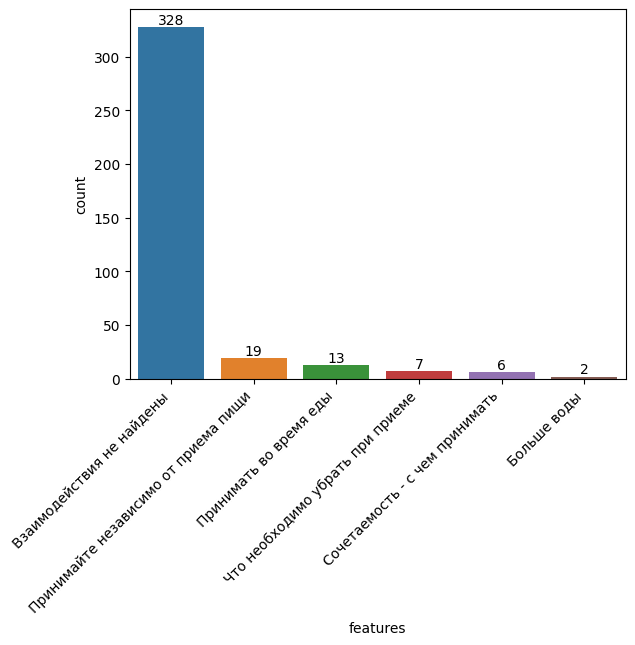

In [15]:
ax = sns.barplot(data, x="features", y="count", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=45, ha="right");

Мы видим, что не надено взаимодействий для 87% ингредиентов. Из остальных - самое частотное - "прием независимо от приема пищи". Повышенное количество воды требуется только при приеме БАДов, содержащих только 2 ингредиента. 